# Step 1 Import Libraries and dataset

In [120]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
kc_house_data = pd.read_csv("kc_house_data.csv")

In [122]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# Step 2 Explore Data Analysis. Find out how one variable related to other and distributions of data

In [123]:
kc_house_data.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [124]:
#Delete the "id" column
kc_house_data.drop("id",axis=1,inplace=True)

In [125]:
#Count the price range variable
kc_house_data.price.value_counts()

450000.0     172
350000.0     172
550000.0     159
500000.0     152
425000.0     150
325000.0     148
400000.0     145
375000.0     138
300000.0     133
525000.0     131
250000.0     130
475000.0     120
330000.0     119
650000.0     117
275000.0     113
315000.0     111
415000.0     111
280000.0     110
600000.0     110
390000.0     110
440000.0     109
320000.0     108
435000.0     105
340000.0     103
310000.0     101
335000.0      98
420000.0      97
360000.0      96
260000.0      95
265000.0      95
            ... 
1544500.0      1
431750.0       1
234975.0       1
1151250.0      1
804995.0       1
870515.0       1
475500.0       1
225900.0       1
1825000.0      1
394250.0       1
739999.0       1
838300.0       1
386380.0       1
369990.0       1
805500.0       1
3120000.0      1
271675.0       1
2888000.0      1
402723.0       1
369946.0       1
739888.0       1
772650.0       1
304400.0       1
644000.0       1
543200.0       1
641500.0       1
575950.0       1
674250.0      

In [126]:
kc_house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [127]:
# remove date object - this is linear regression model. timeseries data not required.
kc_house_data.drop("date",axis=1,inplace=True)


In [128]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [129]:
kc_house_data = kc_house_data.replace('?', np.nan)
kc_house_data = kc_house_data.dropna()

## Perform Bi-variate analysis

In [130]:

corr=kc_house_data.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


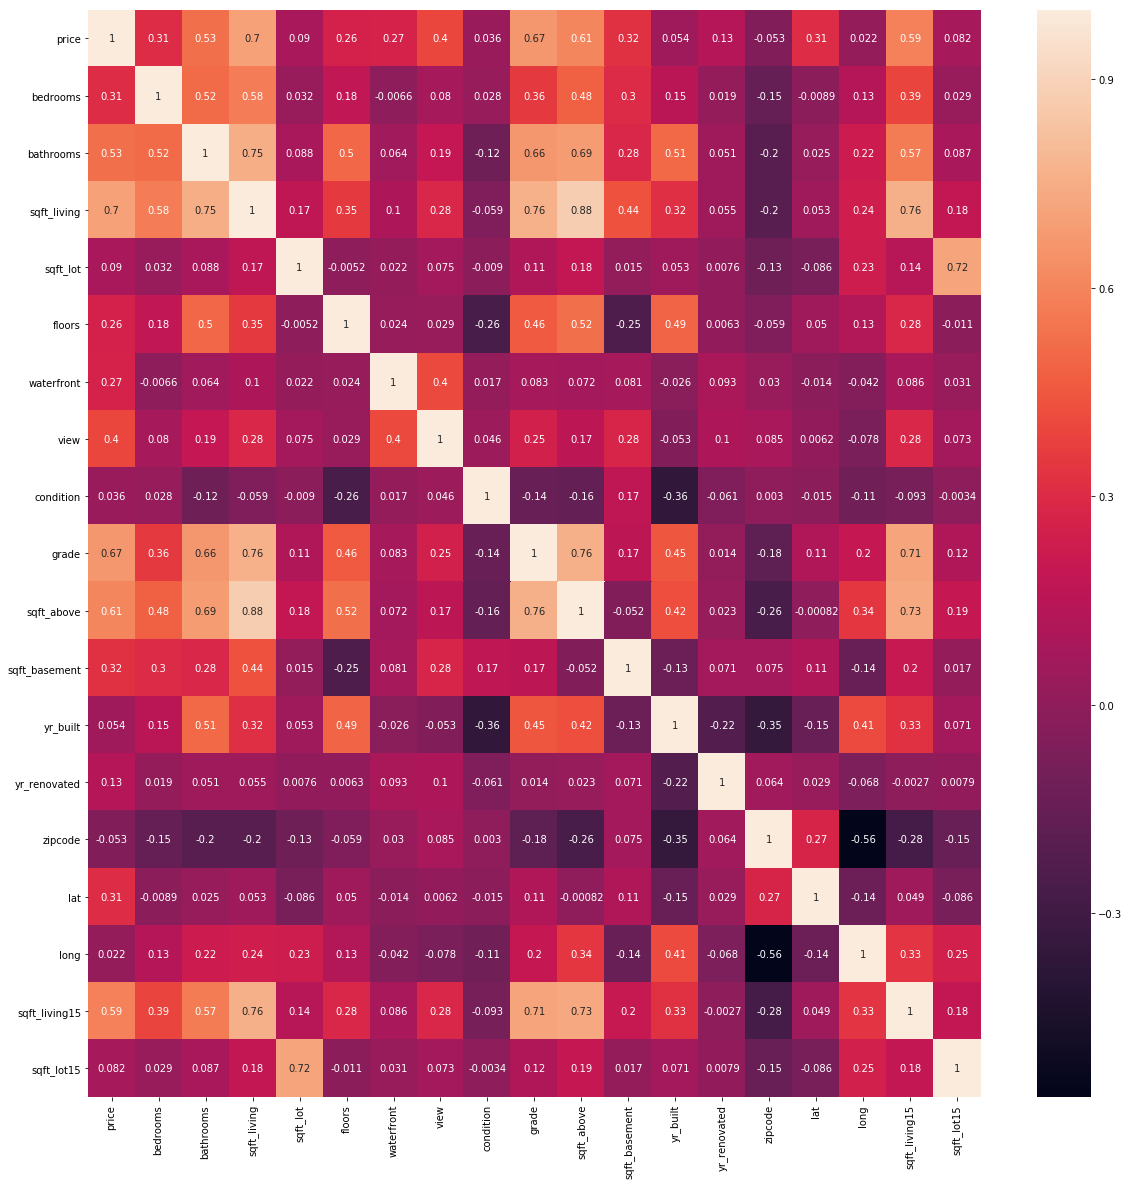

In [131]:
plt.figure(figsize=(20,20))

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

C:\Users\234284\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


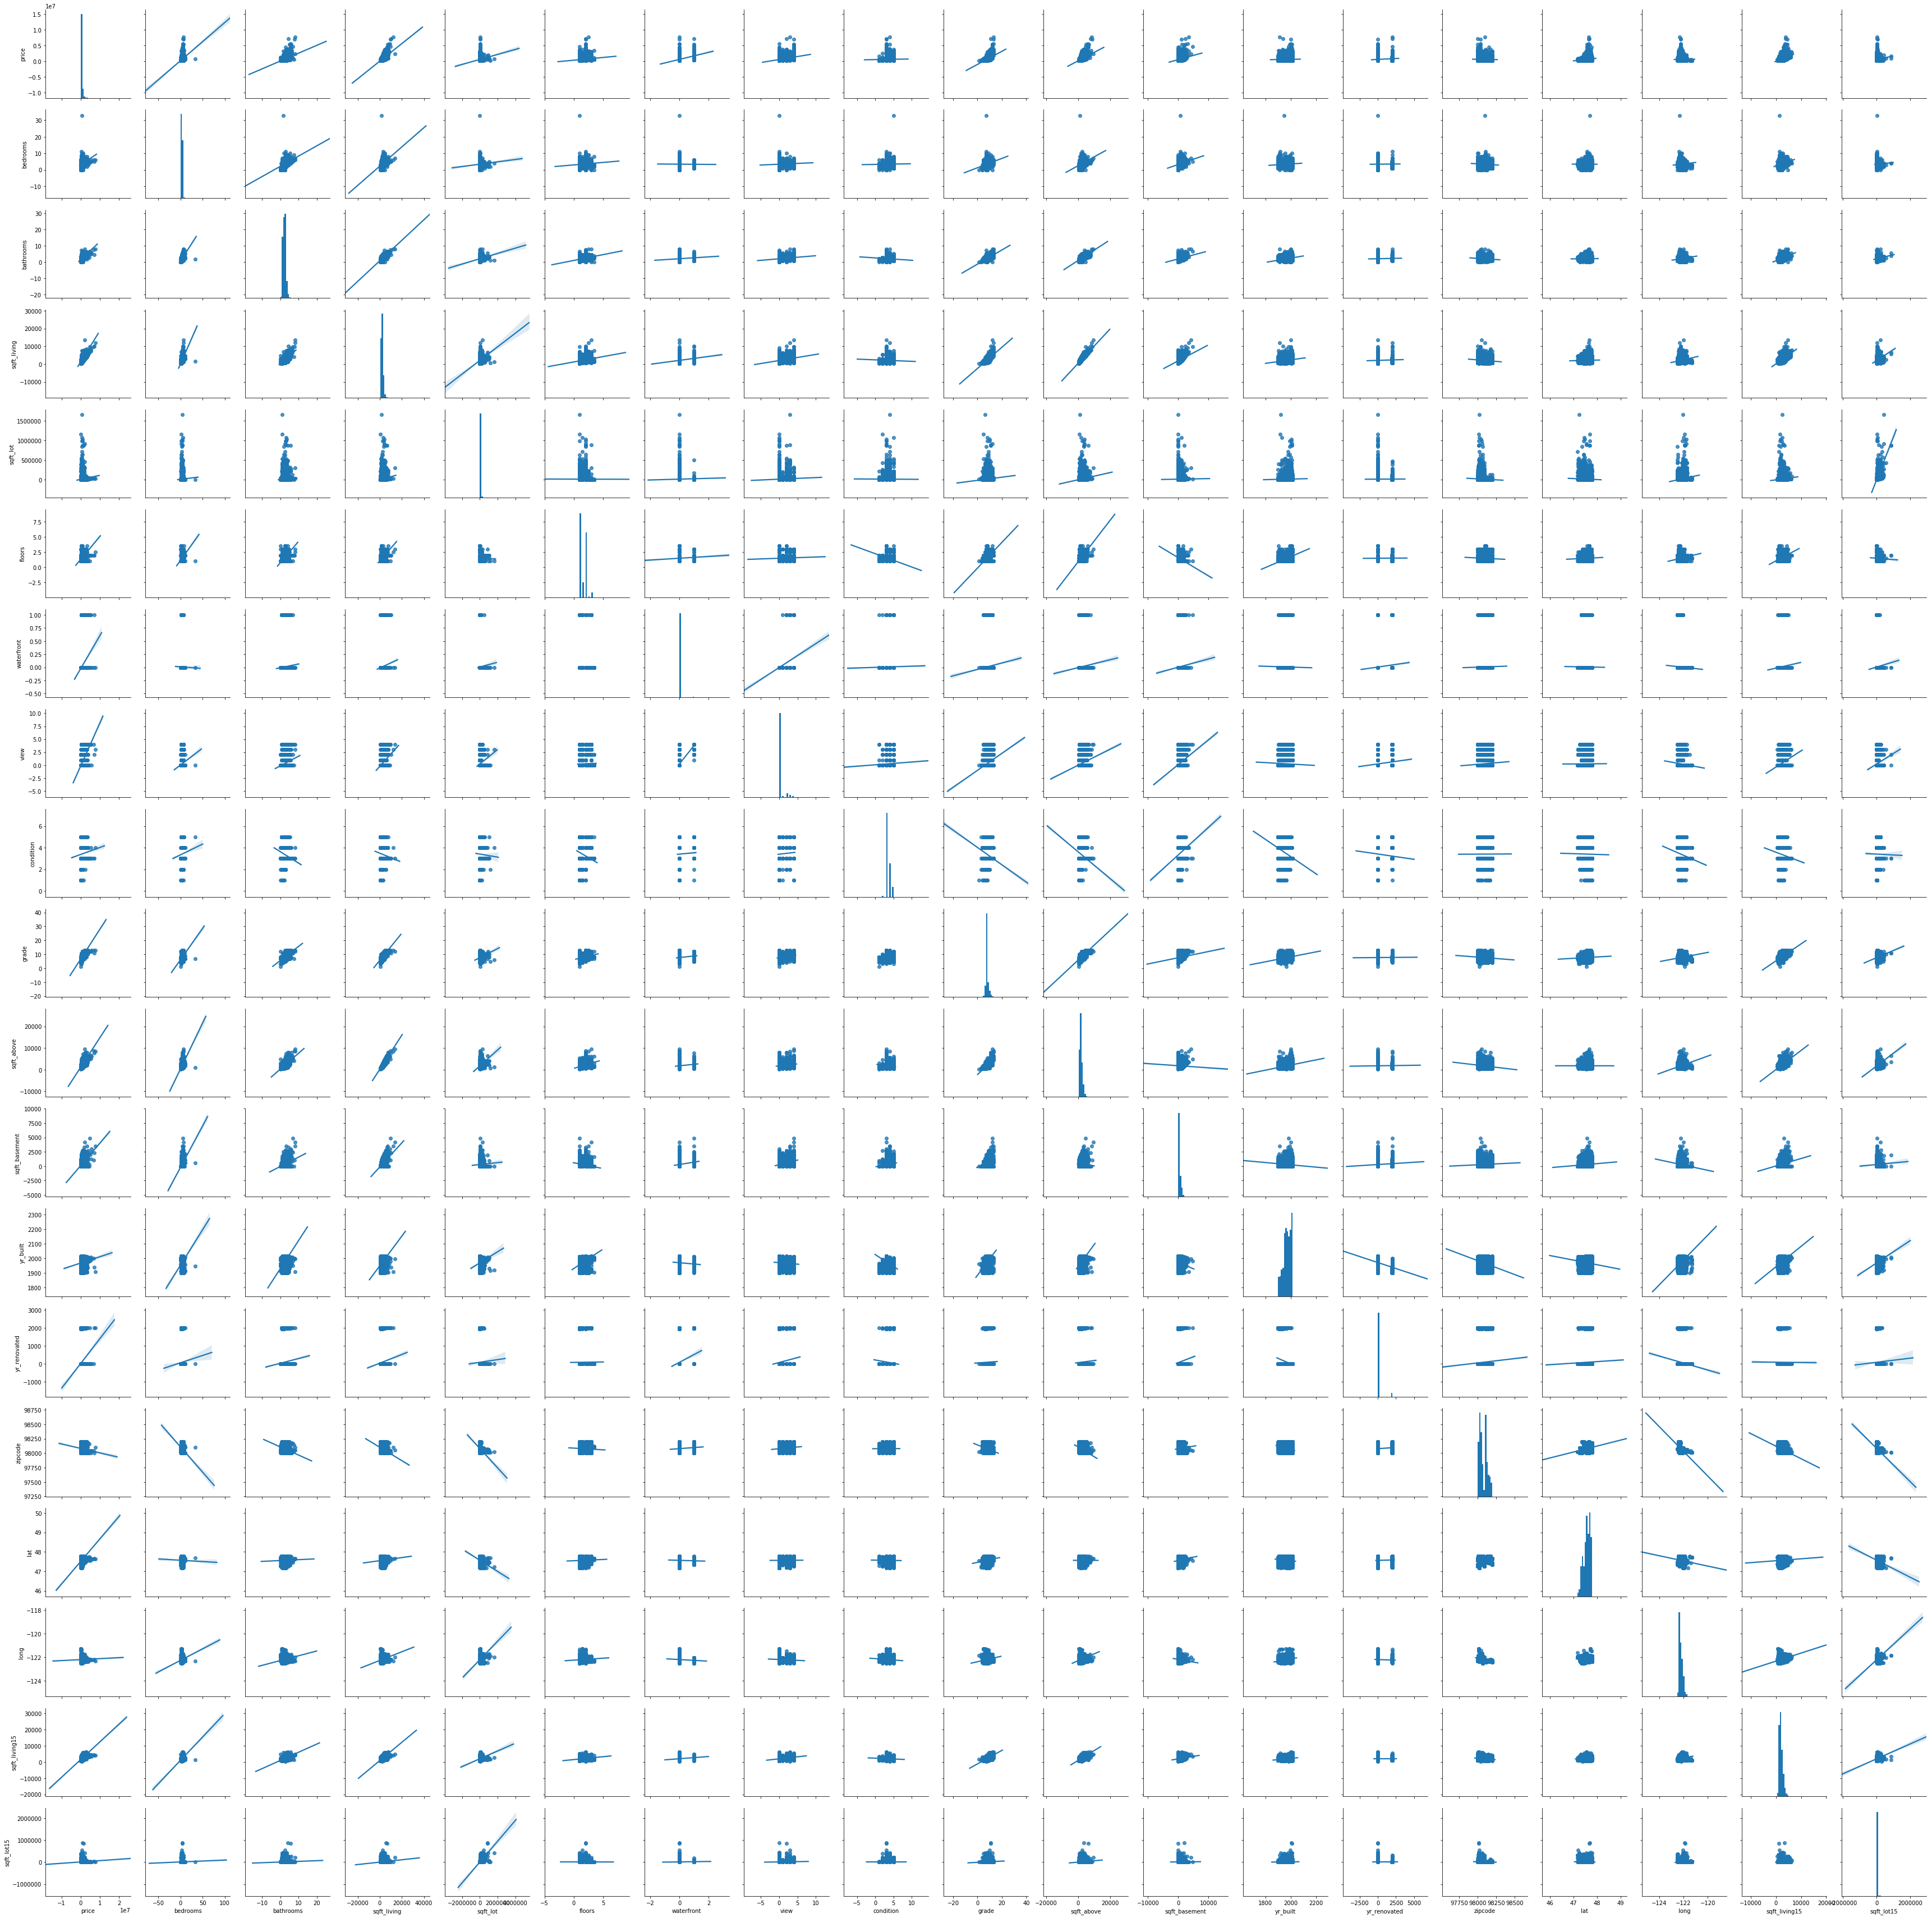

In [83]:
sns.pairplot(kc_house_data, kind='reg')

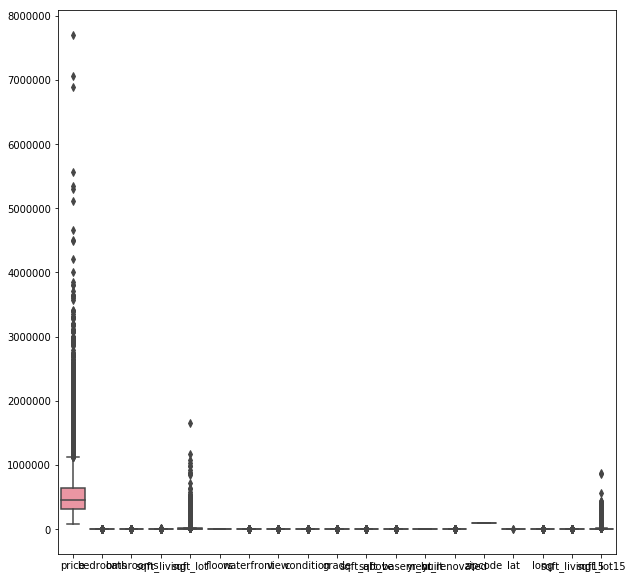

In [84]:

plt.figure(figsize=(10,10))
b = sns.boxplot(data = kc_house_data)

In [132]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print(f'{fence_low}')
    print(f'{fence_high}')
    df_new = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_new

In [133]:
kc_house_data_new=remove_outlier(kc_house_data,'bedrooms')

1.5
5.5


In [134]:
colnames=kc_house_data.columns.tolist()



In [135]:
for col_name in kc_house_data.columns.tolist():
    if col_name != 'price':
        kc_house_data_new=remove_outlier(kc_house_data,col_name)

1.5
5.5
0.625
3.625
-257.5
4234.5
-3432.0
19160.0
-0.5
3.5
0.0
0.0
0.0
0.0
1.5
5.5
5.5
9.5
-340.0
3740.0
-840.0
1400.0
1882.0
2066.0
0.0
0.0
97905.5
98245.5
47.1605
47.9885
-122.63249999999996
-121.82050000000001
185.0
3665.0
-2374.5
17557.5


In [136]:
##kc_house_data_new.drop("price",axis=1,inplace=True)

### Split into the Training set and Test set

In [137]:
X=kc_house_data_new.drop("price",axis=1)
y=kc_house_data_new['price']



In [163]:
#from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=1)

In [164]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19419.000000,19419.000000,19419.000000,1.941900e+04,19419.00000,19419.000000,19419.000000,19419.000000,19419.000000,19419.000000,19419.000000,19419.000000,19419.000000,19419.000000,19419.000000,19419.000000,19419.000000,19419.000000
mean,3.353262,2.081003,2000.995571,8.264170e+03,1.49019,0.004635,0.209846,3.409187,7.574592,1713.423451,287.572120,1970.159483,79.666770,98080.829342,47.562396,-122.227479,1919.754261,7252.012153
std,0.932930,0.750882,843.027070,1.471303e+04,0.54513,0.067922,0.717118,0.652944,1.098335,754.186669,427.696907,30.105973,390.770174,54.131926,0.136126,0.132158,637.348776,3226.405069
min,0.000000,0.000000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.503000,620.000000,651.000000
25%,3.000000,1.500000,1400.000000,4.949000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1950.000000,0.000000,98033.000000,47.480550,-122.334000,1460.000000,5000.000000
50%,3.000000,2.250000,1850.000000,7.210000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,1972.000000,0.000000,98074.000000,47.573200,-122.262000,1780.000000,7264.000000
75%,4.000000,2.500000,2440.000000,9.576000e+03,2.00000,0.000000,0.000000,4.000000,8.000000,2100.000000,560.000000,1998.000000,0.000000,98118.000000,47.678600,-122.151000,2260.000000,9127.000000
max,33.000000,8.000000,12050.000000,1.164794e+06,3.50000,1.000000,4.000000,5.000000,13.000000,8570.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,17550.000000


## Feature scaling

In [165]:
#from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

Xtrain_standardized = sc.fit_transform(Xtrain)
Xtest_standardized = sc.transform(Xtest)

C:\Users\234284\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\234284\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\234284\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


# PCA for dimensionality reduction

In [166]:

#from scipy.stats import zscore

#Xtrain_z = Xtrain.apply(zscore)

cov_matrix = np.cov(Xtrain_standardized.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00007357  0.50429252  0.58967409  0.04565533  0.1641412   0.00539927
   0.08918424  0.03022839  0.3479051   0.48535823  0.30826527  0.1496078
   0.02349533 -0.15342639 -0.02625841  0.13732442  0.39374334  0.19128167]
 [ 0.50429252  1.00007357  0.74377843  0.02432415  0.50877097  0.0498989
   0.1830085  -0.12645193  0.65252245  0.67374798  0.28029311  0.51309859
   0.05810627 -0.1998827   0.00704034  0.2261938   0.56163429  0.03957437]
 [ 0.58967409  0.74377843  1.00007357  0.093784    0.35063709  0.09336178
   0.28929629 -0.05186603  0.74148449  0.86282675  0.45285492  0.30588761
   0.06127957 -0.1857474   0.03651459  0.21906242  0.74881973  0.25728459]
 [ 0.04565533  0.02432415  0.093784    1.00007357 -0.07479301  0.02180782
   0.03604145  0.00663252  0.04484549  0.08676387  0.03215055 -0.01566251
   0.00703095 -0.08708295 -0.0466827   0.10770957  0.08535519  0.2750629 ]
 [ 0.1641412   0.50877097  0.35063709 -0.07479301  1.00007357  0.01462024
   0.02891888 

In [167]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.56533293e-01 -1.65374901e-01  5.22256458e-02 -3.14602666e-01
  -2.53301185e-02 -2.33971036e-01 -1.73505257e-01 -8.68884818e-02
   1.96986918e-01  5.20603737e-01  4.89843275e-01 -1.16691466e-01
   1.54806589e-01  5.86331029e-02 -2.89877250e-01  1.82340644e-01
  -6.34541799e-02  2.78139171e-16]
 [ 3.65696531e-01 -2.61838469e-02 -1.44257518e-01 -1.02629241e-01
  -5.96076175e-02 -1.11536007e-01 -1.25145504e-01 -1.17904190e-03
   2.13593635e-01 -1.15021753e-01 -9.96283501e-02 -2.47124068e-01
  -4.58309489e-02  5.20181337e-01  1.77387233e-01 -4.37927035e-01
   4.20473007e-01 -2.50339055e-16]
 [ 3.97175481e-01 -2.00773205e-01 -2.26409407e-02 -1.07016714e-01
   1.94995397e-02 -2.25196473e-02 -3.11705947e-02 -1.06735473e-02
  -3.54529383e-02  3.59649310e-02 -7.98085217e-02  1.80946229e-01
  -1.14666508e-01 -3.80401342e-01  2.14166321e-01 -1.98599401e-01
  -1.28142641e-01 -6.97681363e-01]
 [ 4.60669069e-02 -6.14421019e-02  2.82192240e-01  1.21149004e-01
   5.19968920e-01  

In [168]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.61819508  41.11458861  51.67440523  58.46385077  64.26021101
  69.68415609  74.55561471  79.13765916  83.26327412  86.97757962
  89.91500587  92.32477149  94.59945283  96.19247164  97.57177759
  98.91549894 100.         100.        ]


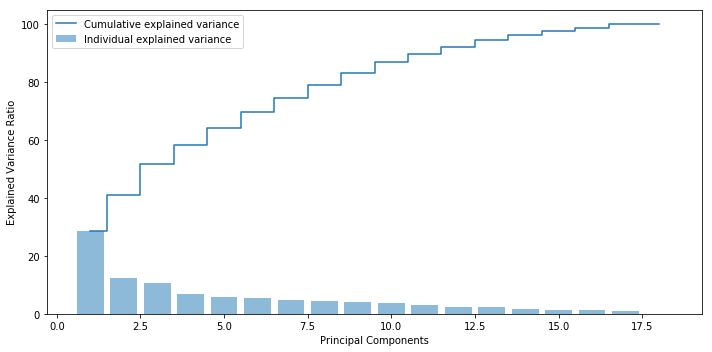

In [169]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [170]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
pca.fit(Xtrain_standardized)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [171]:
pca.components_

array([[ 2.56533293e-01,  3.65696531e-01,  3.97175481e-01,
         4.60669069e-02,  2.33214868e-01,  4.36920506e-02,
         1.15996477e-01, -8.45119232e-02,  3.65565961e-01,
         3.93384271e-01,  9.04161168e-02,  2.52652059e-01,
         3.93631294e-03, -1.63619611e-01, -1.64926165e-02,
         1.85138987e-01,  3.59376617e-01,  1.13163189e-01],
       [ 1.65374901e-01,  2.61838469e-02,  2.00773205e-01,
         6.14421019e-02, -2.65998701e-01,  1.83518055e-01,
         3.43378164e-01,  2.79643371e-01,  4.89486280e-02,
        -4.72703914e-02,  4.79731920e-01, -3.78376649e-01,
         1.71415626e-01,  2.51393625e-01,  1.84389287e-01,
        -2.94180392e-01,  9.94972535e-02,  1.62394655e-01],
       [ 5.22256458e-02, -1.44257518e-01, -2.26409407e-02,
         2.82192240e-01, -3.90515839e-01, -6.19368051e-04,
        -4.89227761e-02,  2.06175859e-01, -1.34060820e-01,
        -4.43241218e-02,  3.34635761e-02, -4.70151952e-02,
        -1.00195760e-01, -4.20974857e-01, -2.98488028e

In [172]:
pca.explained_variance_

array([5.15165411, 2.24951633, 1.90090684, 1.22219011, 1.04342161,
       0.97638194, 0.87692706, 0.82482868, 0.74266533, 0.66862418,
       0.52877563, 0.43378972, 0.40947277, 0.28676448])

In [173]:
pca.explained_variance_ratio_

array([0.28618195, 0.12496394, 0.10559817, 0.06789446, 0.0579636 ,
       0.05423945, 0.04871459, 0.04582044, 0.04125615, 0.03714305,
       0.02937426, 0.02409766, 0.02274681, 0.01593019])

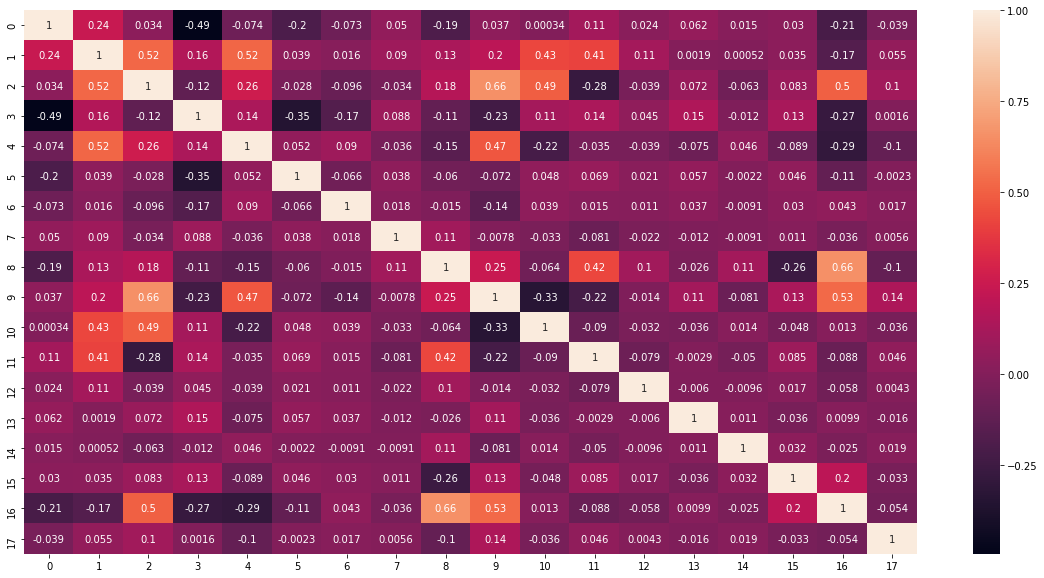

In [174]:
corr_new=pd.DataFrame(pca.components_).corr()

plt.figure(figsize=(20,10))

sns.heatmap(corr_new, 
            xticklabels = corr_new.columns.values,
            yticklabels = corr_new.columns.values,
            annot = True);

In [176]:
model = LinearRegression()
model.fit(Xtrain_standardized, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Train score

In [179]:
# Train R^2
ypred = model.predict(Xtrain_standardized)

print(model.score(Xtrain_standardized, ytrain))

0.7089979866498151


# Test Score

In [178]:
print(model.score(Xtest_standardized, ytest))

0.6998232019218951


In [181]:
# Evaluate using Cross Validation
from sklearn import model_selection

In [182]:
seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

In [183]:
k_model = LinearRegression()

In [186]:
results = model_selection.cross_val_score(k_model, Xtrain_standardized, ytrain, scoring='neg_mean_squared_error', cv=kfold)
print("Mean Square Error: %.3f (%.3f)" % (-results.mean(), results.std()))

Mean Square Error: 31628439755.821 (6559775909.133)


# Feature Selection (without PCA)

In [188]:
import sys
!{sys.executable} -m pip install mlxtend

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000233E676EE80>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /simple/mlxtend/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000233E676E630>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /simple/mlxtend/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000233E676E5F8>: Failed to establish a new connection: [WinError 10

In [189]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

ModuleNotFoundError: No module named 'mlxtend'